Сгенерируйте матрицу В размером 3х3 со случайными элементами, равномерно распределенными на интервале от 0 до 1 и найдите её определитель.

# Задание 1 

In [4]:
import numpy as np

B = np.random.uniform(size=(3,3))
print(B)
print("det(B) =", np.linalg.det(B))


[[0.88530641 0.69890697 0.22372864]
 [0.51673634 0.29336483 0.49014848]
 [0.51721962 0.20883735 0.67449674]]
det(B) = 0.00834189359308943


# Задание 2

Для двух векторов:
С=$\left( \begin{matrix}
   1  \\
   2.94  \\
   -2.2  \\
   0.1   \\   
\end{matrix} \right)$ и b= {0.6; 3.2; -1.8, 0.05} найти меру косинусного сходства.

In [6]:
c = np.array([1, 2.94, -2.2, 0.1]).T
b = np.array([0.6, 3.2, -1.8, 0.05])

print("cos(c,b) =", c @ b / (np.linalg.norm(c) * np.linalg.norm(b)))

cos(c,b) = 0.9864935664827554


# Задание 3 

Для заданного ниже объекта s проделайте следующее:

Создайте новый Series, значения которого совпадают со значениями s, а индексы - целочисленные значения от 4 до 15, не включая 15.
Выберите из s только целочисленные элементы и вычислите их дисперсию. (*)

Пояснения:
Дисперсия рассчитывается с помощью функции из библиотеки numpy: np.var( , ddof=0) или встроенной в python функции: .var(ddof=1)

In [9]:
import pandas as pd
import numpy as np

s = pd.Series(data=['1', 5, 3.1, 'hello', -5, -1000, 12.78, 'world', 10.10, '!', 98], 
              index=range(6, 28, 2))
s2 = pd.Series(data=s.values, index=range(4, 15))

s2_integer = s2.apply(lambda x: isinstance(x, int))
print(s2[s2_integer])

print(np.var(s2[s2_integer]))

avg = np.average(s2[s2_integer])
print(sum([(x -  avg) ** 2 for x in s2[s2_integer].values]) / s2[s2_integer].size)

5         5
8        -5
9     -1000
14       98
dtype: object
201563.25
201563.25


### Информация для последующих заданий
- Для всех последующих заданий будем использовать обезличенные транзакционные банковские данные. Для этого считайте в переменные tr_mcc_codes, tr_types, transactions и gender_train из одноимённых таблиц из папки data. Для таблицы transactions используйте только первые n=1000000 строк. Обратите внимание на разделители внутри каждого из файлов - они могут различаться!

### Описание данных
#### Таблица transactions.csv

Таблица содержит историю транзакций клиентов банка за один год и три месяца.

#### Формат данных

customer_id,tr_datetime,mcc_code,tr_type,amount,term_id

111111,15 01:40:52,1111,1000,-5224,111111

111112,15 15:18:32,3333,2000,-100,11122233

...

#### Описание полей
customer_id — идентификатор клиента;

tr_datetime — день и время совершения транзакции (дни нумеруются с начала данных);

mcc_code — mcc-код транзакции;

tr_type — тип транзакции;

amount — сумма транзакции в условных единицах со знаком; + — начисление средств клиенту (приходная транзакция), - — списание средств (расходная транзакция);

term_id — идентификатор терминала;

### Таблица gender_train.csv

Данная таблица содержит информацию по полу для части клиентов, для которых он известен. Для остальных клиентов пол неизвестен.

#### Формат данных
customer_id,gender

111111,0

111112,1

...

#### Описание полей
customer_id — идентификатор клиента;

gender — пол клиента;

### Таблица tr_mcc_codes.csv

Данная таблица содержит описание mcc-кодов транзакций.

#### Формат данных
mcc_code;mcc_description

1000;словесное описание mcc-кода 1000

2000;словесное описание mcc-кода 2000

...

#### Описание полей
mcc_code – mcc-код транзакции;

mcc_description — описание mcc-кода транзакции.

### Таблица tr_types.csv

Данная таблица содержит описание типов транзакций.

#### Формат данных
tr_type;tr_description

1000;словесное описание типа транзакции 1000

2000;словесное описание типа транзакции 2000

...

#### Описание полей
tr_type – тип транзакции;

tr_description — описание типа транзакции;

# Задание 4

1. В датафрейме transactions задайте столбец  customer_id в качестве индекса.
2. Выделите клиента с максимальной суммой транзакции (то есть с максимальным приходом на карту). (\*)
3. Найдите у него наиболее часто встречающийся модуль суммы приходов/расходов. (\**)
4. Выделите клиента с минимальной суммой транзакции.



##### Пояснения:
(\*) Если у клиента были транзакции [-10000, 10, 0, -10], то максимумом будет являться значение 10. <br>
(\**) Если у клиента были транзакции [-10000, 10, 0, -10], то наиболее встречающийся модуль суммы транзакций равен 10, и встретился он 2 раза.

In [10]:
### Type your code here
import pandas as pd


transactions = pd.read_csv("transactions.xls", nrows=1000000, index_col="customer_id")
mx_client = transactions[transactions["amount"] == transactions["amount"].max()]
print(mx_client)

mx_client_transactions = transactions.loc[mx_client.index[0]]
print(mx_client_transactions.head())

mx_client_transactions["amount"].apply(lambda x: abs(x)).value_counts().idxmax()

mn_client = transactions[transactions["amount"] == transactions["amount"].min()]
print(mn_client)

FileNotFoundError: [Errno 2] No such file or directory: 'transactions.xls'

# Задание 5

Соедините transactions со всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [11]:
### Type your code here

import pandas as pd


transactions = pd.read_csv("transactions.xls", nrows=1000000)
tr_mcc_codes = pd.read_csv("tr_mcc_codes.xls", sep=';')
tr_types = pd.read_csv("tr_types.xls", sep=';')
gender_train = pd.read_csv("gender_train.xls")

merged = pd.merge(transactions, tr_mcc_codes)
merged = pd.merge(merged, tr_types)
merged = pd.merge(merged, gender_train, how='left')

merged.head()

print(len(merged))


FileNotFoundError: [Errno 2] No such file or directory: 'transactions.xls'

# Задание 6

1. Определите модуль разницы между медианными тратами женщин и мужчин (трата - отрицательное значение amount). 



##### Пояснения:


(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

In [12]:
### Type your code here
gender_1_med = merged[(merged["gender"] == 1) & (merged["amount"] < 0)]["amount"].median()
gender_0_med = merged[(merged["gender"] == 0) & (merged["amount"] < 0)]["amount"].median()

abs(gender_0_med - gender_1_med)

NameError: name 'merged' is not defined

# Задание 7

1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можно использовать строковые методы для датафрейма - .str.split(), например. 
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.<br>
Снять ограничение на количество выводимых строк можно с помощью:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(a)

In [13]:
### Type your code here
# merged.head()
merged["tr_day"] = merged["tr_datetime"].apply(lambda date: date.split()[0])
# merged = merged.rename(columns={"tr_datetime": "tr_day"})

# оставляем только те дни, у которых число mcc кодов > 75
groups = merged.groupby("tr_day")["mcc_code"].nunique()
groups = groups[groups > 75].reset_index() # нужно удалить индекс, иначе не заработает
merged[merged["tr_day"].isin(groups["tr_day"])].head()

# 5611;Мужская одежда и аксессуары, включая одежду для мальчиков
# 5621;Готовая женская одежда
# 5631;Аксессуары для женщин
# 5977;Магазины косметики
# 7230;Салоты красоты и парикмахерские
# 5921;Магазины с продажей спиртных напитков на вынос (пиво, вино и ликер)

groups_mcc_gender = merged.groupby(["mcc_code", "gender"])
counted = groups_mcc_gender.count()
# 0 - женщины, 1 - мужчины
print("women men")
for mcc_code in (5611, 5621, 5631, 5977, 7230, 5921):
    print(counted.loc[mcc_code, 0][0], counted.loc[mcc_code, 1][0])
print()


medians = groups_mcc_gender.median(numeric_only=True)

# 5992;Флористика
print(abs(medians["amount"].loc[5992, 1]) > abs(medians["amount"].loc[5992, 0]))

# 6211;Ценные бумаги: брокеры/дилеры
print(abs(medians["amount"].loc[6211, 0]) > abs(medians["amount"].loc[6211, 1]))

# 5813;Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков
print(abs(medians["amount"].loc[5813, 0]) < abs(medians["amount"].loc[5813, 1]))

# Верные ответы: 1, 3, 5


NameError: name 'merged' is not defined

# Задание 8

1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в созданную функцию plot_pivot_table.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
     1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
     2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
     3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
     4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
     5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

True
False
True


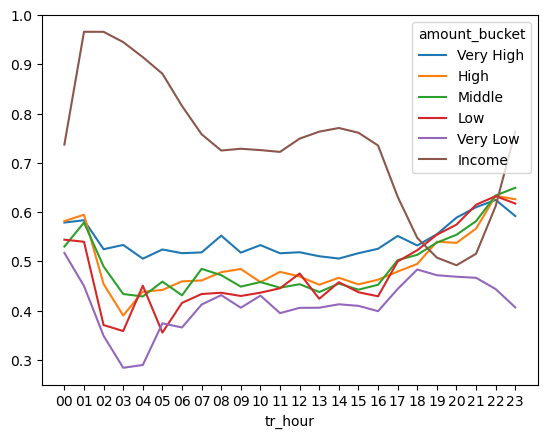

In [10]:
### Type your code here
# print(merged[merged["amount"] < 0]["amount"])
merged["amount_bucket"] = pd.qcut(merged[merged["amount"] < 0]["amount"], 5, labels=['Very High', 'High', 'Middle', 'Low', 'Very Low'])

merged["amount_bucket"] = merged["amount_bucket"].cat.add_categories("Income").fillna("Income")
merged

merged["tr_hour"] = merged["tr_datetime"].apply(lambda date: date.split()[1].split(":")[0])
merged

def plot_pivot_table(pivot_table):
    plot = pivot_table.plot()
    plot.set_xticks(range(len(pivot_table.index)))
    plot.set_xticklabels(pivot_table.index.values)

merged

pivot_table = pd.pivot_table(merged, values="gender", index="tr_hour", columns="amount_bucket")
plot_pivot_table(pivot_table)

# по умолчанию считает среднее арифметическое. в данном случае можно интерпретировать как процент мужчин
pivot_table

#  1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
#  2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
#  3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
#  4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
#  5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

#  1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
print(pivot_table.iloc[1:6].mean()["Income"] > 0.85)

#  2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
print(pivot_table.mean()["Income"] < 0.5)

#  3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
print(pivot_table.loc['03']["Very Low"] < 0.3)

#  4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
# Ответ: нет, см. фиолетовую кривую. не >80%, но есть особый период от 3х до 4х часов ночи

#  5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.
# Ответ: да. кривая Very High (голубая) выше 0.5

## Задание 9
Считайте данные из файла 'winemag-data-130k-v2.csv'. 
а) Постройте точечный график (Scatter plot), по оси х отложите points, а по y - price.
б) Постройте график Barplot количества вин по странам.

<Axes: xlabel='country', ylabel='price'>

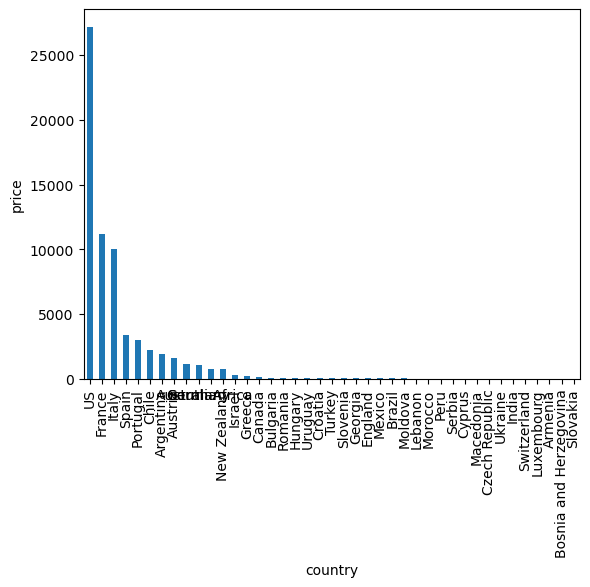

In [11]:
### Type your code here
import pandas as pd


wines = pd.read_csv("winemag-data-130k-v2.xls")
wines.plot.scatter("points", "price")

wines["country"].value_counts().plot.bar()
